# Loading the Dataset

In [19]:
import os
import pandas as pd


def load_data_from_directory(directory):
    data_list = pd.DataFrame()

    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        df = pd.read_csv(path, header=None, delim_whitespace=True)
        data_list = pd.concat([data_list, df], axis=1)

    return data_list


X = load_data_from_directory('./har/UCI HAR Dataset/train/Inertial Signals/')
X

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.010767,0.006579,0.008929,0.007489,0.006141,0.006944,0.003552,0.002537,0.004085,0.005118,...,0.012667,0.010475,0.011098,0.013411,0.018454,0.025197,0.032328,0.039852,0.037449,0.028818
1,-0.004688,-0.007488,-0.008430,-0.007258,-0.004191,-0.005426,-0.004753,-0.000193,0.000445,-0.000441,...,-0.013667,-0.020857,-0.029342,-0.030037,-0.029480,-0.026172,-0.026406,-0.034741,-0.037973,-0.038650
2,0.004456,0.003046,0.001776,0.000969,0.000937,0.003514,0.003622,-0.000471,-0.004462,-0.004806,...,-0.022659,-0.016851,-0.017540,-0.019214,-0.017094,-0.018794,-0.020599,-0.020910,-0.022114,-0.020235
3,-0.010185,-0.011253,-0.012196,-0.011143,-0.007826,-0.001034,0.003851,-0.000352,-0.004737,-0.003945,...,-0.019424,-0.020114,-0.019540,-0.017057,-0.013911,-0.015316,-0.017816,-0.020150,-0.016960,-0.007120
4,-0.003857,-0.002838,-0.003086,-0.004574,-0.007336,-0.008438,-0.005469,-0.004143,-0.005924,-0.007195,...,0.019676,0.020304,0.018784,0.015992,0.014330,0.012444,0.012461,0.011451,0.012684,0.015605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,-0.049144,-0.291873,-0.407241,-0.224637,-0.103755,-0.203184,-0.260671,-0.227460,-0.297461,-0.374078,...,0.629654,0.863918,0.980709,1.013773,1.046258,0.966485,0.740581,0.512633,0.312086,0.169856
7348,-0.371869,-0.265819,-0.128942,-0.241788,-0.286061,-0.186658,-0.199820,-0.253797,-0.330510,-0.365552,...,-0.200444,-0.199221,-0.297251,-0.406554,-0.523906,-0.586418,-0.550446,-0.506336,-0.444789,-0.378067
7349,0.056845,0.027170,-0.005757,0.005458,0.036483,0.038135,0.020571,-0.077870,-0.268634,-0.394393,...,-0.978920,-0.807291,-0.637173,-0.562788,-0.690228,-0.694147,-0.704308,-0.760954,-0.677963,-0.627501
7350,-0.005741,-0.003261,0.033513,0.114615,0.179240,0.174496,0.096170,-0.065018,-0.239955,-0.240548,...,-0.447757,-0.249343,-0.123552,-0.228810,-0.211935,-0.286205,-0.423730,-0.425461,-0.475547,-0.412959


In [20]:
from keras.src.utils import np_utils

y = pd.read_csv('./har/UCI HAR Dataset/train/y_train.txt', header=None, names=['label']).apply(lambda x: x - 1)
y = np_utils.to_categorical(y, num_classes=6)
y

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

<Axes: ylabel='0'>

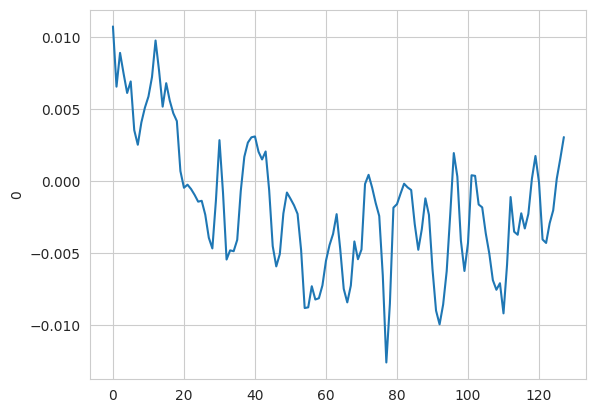

In [21]:
import seaborn as sns

sns.lineplot(data=X.iloc[0, :128])


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.reshape(X, (X.shape[0], 128, 9))

n = 0.3
random_seed = 42
np.random.seed(random_seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=n, random_state=random_seed)
X_train

array([[[-1.350800e-03, -2.852992e-03, -3.541561e-03, ...,
         -5.542443e-04, -4.587041e-03, -2.925761e-03],
        [-2.059671e-03, -4.771774e-03, -4.344644e-03, ...,
         -6.916039e-03, -6.026735e-03, -3.732307e-03],
        [-2.782275e-03, -3.105105e-03, -3.452284e-03, ...,
          4.788864e-03,  4.473641e-03,  1.941925e-03],
        ...,
        [-2.408115e-03, -1.921663e-03, -4.832872e-04, ...,
         -7.644992e-04, -1.131820e-03, -2.169128e-03],
        [-8.499989e-04,  6.590584e-05, -6.174658e-04, ...,
          1.536751e-04, -6.664257e-04, -6.807121e-05],
        [ 1.427635e-03,  1.285311e-03,  9.681586e-04, ...,
          1.942944e-03,  2.278694e-03,  2.241690e-03]],

       [[-3.623274e-02, -5.075529e-02, -4.431976e-02, ...,
         -1.756375e-01, -2.289305e-01, -2.796439e-01],
        [-3.303385e-01, -3.138243e-01, -2.718974e-01, ...,
         -5.681512e-02,  3.904364e-02,  8.476107e-02],
        [ 1.258103e-01,  1.532519e-01,  1.240023e-01, ...,
         -1.77

In [23]:
X_heldback = load_data_from_directory("./har/UCI HAR Dataset/test/Inertial Signals")
X_heldback = np.reshape(X_heldback, (X_heldback.shape[0], 128, 9))
y_heldback = pd.read_csv('./har/UCI HAR Dataset/test/y_test.txt', header=None, names=['label']).apply(lambda x: x - 1)
y_heldback = np_utils.to_categorical(y_heldback, num_classes=6)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
epochs=50
trials=10
def print_metrics(model, X_train, X_test, X_heldback):
    # Fit the best model to get the history object (if not already available)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=10, validation_data=(X_test, y_test), verbose=0)

    # Extract accuracy and loss values
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plot training & validation accuracy
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

    # Predict on test data
    y_pred = model.predict(X_heldback)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
    y_true = np.argmax(y_heldback, axis=1)  # Assuming y_test is also one-hot encoded

    # Generate classification report
    target_names = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]
    report = classification_report(y_true, y_pred_classes, target_names=target_names, zero_division=0)
    print(report)

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Plotting the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


Trial 10 Complete [00h 03m 18s]
val_accuracy: 0.9191598494847616

Best val_accuracy So Far: 0.9298881689707438
Total elapsed time: 00h 50m 50s


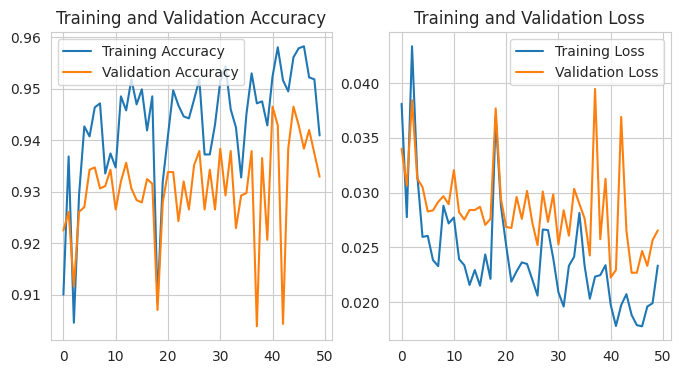

93/93 [==============================] - 0s 3ms/step
                    precision    recall  f1-score   support

           WALKING       0.00      0.00      0.00       496
  WALKING_UPSTAIRS       0.85      0.61      0.71       471
WALKING_DOWNSTAIRS       0.20      0.98      0.33       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.00      0.00      0.00       532
            LAYING       0.87      0.54      0.67       537

          accuracy                           0.33      2947
         macro avg       0.32      0.35      0.28      2947
      weighted avg       0.32      0.33      0.28      2947


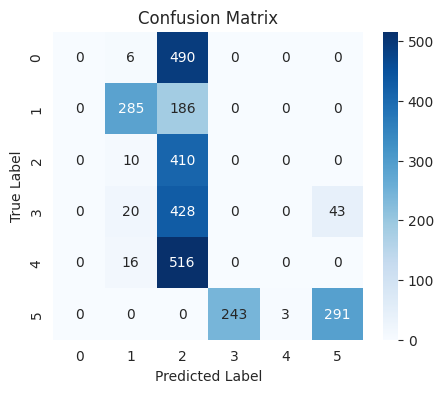

In [32]:
from tensorflow import keras
from keras_tuner import RandomSearch

def build_lstm(hp):
    model = keras.Sequential()
    model.add(keras.layers.LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
                                input_shape=(X_train.shape[1], X_train.shape[2])))
    # model.add(keras.layers.Dense(units=hp.Int('units', min_value=5, max_value=100, step=5), activation='relu'))
    model.add(Dense(6))
    
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop']),
                  loss='mae',
                  metrics=['accuracy', metrics.Precision(), metrics.Recall()])
    return model

tuner = RandomSearch(
    build_lstm,
    objective='val_accuracy',
    max_trials=trials,  # number of different configurations to try
    executions_per_trial=3,  # number of models to train for each trial
    directory='my_dir',  # directory to save logs
    project_name='keras_lstm'
)

tuner.search(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))
best_model = tuner.get_best_models(num_models=1)[0]
print_metrics(best_model, X_train, X_test, X_heldback)


Epoch 1/200
515/515 [==============================] - 4s 6ms/step - loss: 0.1611 - accuracy: 0.4460 - precision_3: 0.9847 - recall_3: 0.0750 - val_loss: 0.1445 - val_accuracy: 0.3613 - val_precision_3: 0.9925 - val_recall_3: 0.1804
Epoch 2/200
515/515 [==============================] - 3s 6ms/step - loss: 0.1425 - accuracy: 0.5771 - precision_3: 0.9871 - recall_3: 0.1784 - val_loss: 0.1400 - val_accuracy: 0.6423 - val_precision_3: 0.9925 - val_recall_3: 0.1804
Epoch 3/200
515/515 [==============================] - 3s 6ms/step - loss: 0.1396 - accuracy: 0.6689 - precision_3: 0.9885 - recall_3: 0.1842 - val_loss: 0.1363 - val_accuracy: 0.6967 - val_precision_3: 0.9954 - val_recall_3: 0.1981
Epoch 4/200
515/515 [==============================] - 3s 6ms/step - loss: 0.1303 - accuracy: 0.6970 - precision_3: 0.9343 - recall_3: 0.2903 - val_loss: 0.1200 - val_accuracy: 0.6949 - val_precision_3: 0.8912 - val_recall_3: 0.4121
Epoch 5/200
515/515 [==============================] - 3s 6ms/step -

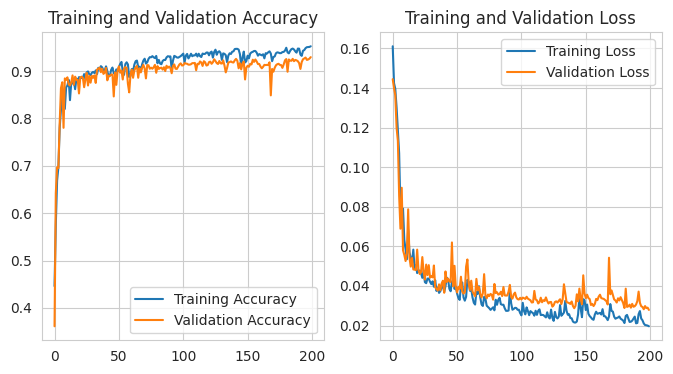

93/93 [==============================] - 0s 2ms/step
                    precision    recall  f1-score   support

           WALKING       0.00      0.00      0.00       496
  WALKING_UPSTAIRS       0.19      0.99      0.32       471
WALKING_DOWNSTAIRS       0.44      0.05      0.10       420
           SITTING       0.00      0.00      0.00       491
          STANDING       0.00      0.00      0.00       532
            LAYING       0.00      0.00      0.00       537

          accuracy                           0.17      2947
         macro avg       0.11      0.17      0.07      2947
      weighted avg       0.09      0.17      0.06      2947


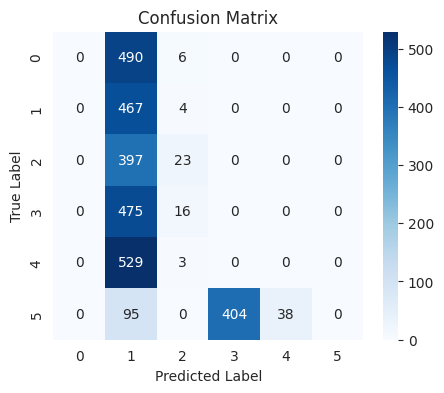

In [25]:
from keras.src.layers import Dense, LSTM
from keras import Sequential, metrics

model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(6))
model.compile(optimizer='adam', loss='mae',
              metrics=['accuracy', metrics.Precision(), metrics.Recall()])
print_metrics(model, X_train, X_test, X_heldback)


## Timeseries Classification Transformer
See https://keras.io/examples/timeseries/timeseries_classification_transformer/

In [34]:
from keras.src.optimizers import Adam
import keras
from keras import Input, Model
from keras.src.layers import MultiHeadAttention, Dropout, LayerNormalization, Conv1D, GlobalAveragePooling1D


def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = Dropout(dropout)(x)
    x = Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)
    outputs = Dense(6, activation="softmax")(x)
    return Model(inputs, outputs)

input_shape = X_train.shape[1:]
model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy', metrics.Precision(), metrics.Recall()]
)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 9)]             0         []                            
                                                                                                  
 multi_head_attention (Mult  (None, 128, 9)               39945     ['input_1[0][0]',             
 iHeadAttention)                                                     'input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 128, 9)               0         ['multi_head_attention[0][0]']
                                                                                                  
 layer_normalization (Layer  (None, 128, 9)               18        ['dropout[0][0]']         

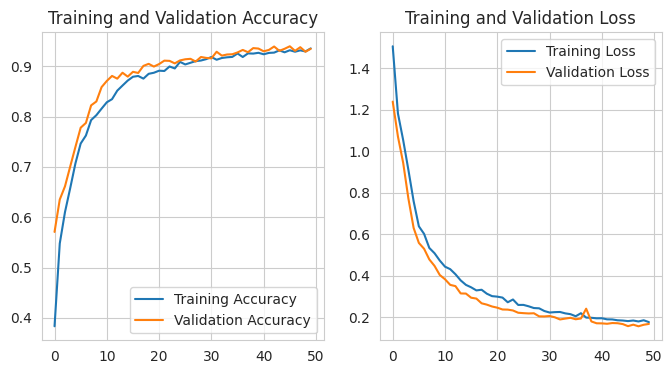

93/93 [==============================] - 1s 12ms/step
                    precision    recall  f1-score   support

           WALKING       0.00      0.00      0.00       496
  WALKING_UPSTAIRS       0.52      0.28      0.37       471
WALKING_DOWNSTAIRS       0.55      0.39      0.46       420
           SITTING       0.15      0.04      0.07       491
          STANDING       0.00      0.00      0.00       532
            LAYING       0.10      0.37      0.16       537

          accuracy                           0.18      2947
         macro avg       0.22      0.18      0.17      2947
      weighted avg       0.20      0.18      0.16      2947


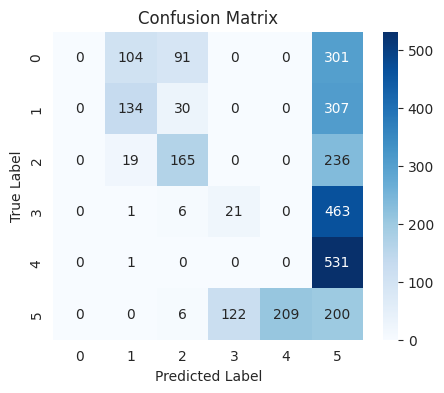

In [35]:
# callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
# model.fit(
#     X_train,
#     y_train,
#     validation_split=0.3,
#     epochs=50,
#     batch_size=10,
#     callbacks=callbacks,
# )
print_metrics(model, X_train, X_test, X_heldback)

In [ ]:
model.evaluate(X_heldback, y_heldback)